In [1]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [3]:
with open('./pickle/lapZeroBrownSpot.pickle', 'rb') as handle:
    lapZeroBrownSpot = pickle.load(handle)
    
with open('./pickle/lapZeroHealthy.pickle', 'rb') as handle:
    lapZeroHealthy = pickle.load(handle)
    
with open('./pickle/lapZeroHispa.pickle', 'rb') as handle:
    lapZeroHispa = pickle.load(handle)
    
with open('./pickle/lapZeroLeafBlast.pickle', 'rb') as handle:
    lapZeroLeafBlast = pickle.load(handle)

with open('./pickle/lapOneBrownSpot.pickle', 'rb') as handle:
    lapOneBrownSpot = pickle.load(handle)
    
with open('./pickle/lapOneHealthy.pickle', 'rb') as handle:
    lapOneHealthy = pickle.load(handle)
    
with open('./pickle/lapOneHispa.pickle', 'rb') as handle:
    lapOneHispa = pickle.load(handle)
    
with open('./pickle/lapOneLeafBlast.pickle', 'rb') as handle:
    lapOneLeafBlast = pickle.load(handle)
    
with open('./pickle/lapTwoBrownSpot.pickle', 'rb') as handle:
    lapTwoBrownSpot = pickle.load(handle)
    
with open('./pickle/lapTwoHealthy.pickle', 'rb') as handle:
    lapTwoHealthy = pickle.load(handle)
    
with open('./pickle/lapTwoHispa.pickle', 'rb') as handle:
    lapTwoHispa = pickle.load(handle)
    
with open('./pickle/lapTwoLeafBlast.pickle', 'rb') as handle:
    lapTwoLeafBlast = pickle.load(handle)
    
with open('./pickle/areaBrownSpot.pickle', 'rb') as handle:
    areaBrownSpot = pickle.load(handle)
    
with open('./pickle/areaHealthy.pickle', 'rb') as handle:
    areaHealthy = pickle.load(handle)
    
with open('./pickle/areaHispa.pickle', 'rb') as handle:
    areaHispa = pickle.load(handle)
    
with open('./pickle/areaLeafBlast.pickle', 'rb') as handle:
    areaLeafBlast = pickle.load(handle)
    
with open('./pickle/perimeterBrownSpot.pickle', 'rb') as handle:
    perimeterBrownSpot = pickle.load(handle)
    
with open('./pickle/perimeterHealthy.pickle', 'rb') as handle:
    perimeterHealthy = pickle.load(handle)
    
with open('./pickle/perimeterHispa.pickle', 'rb') as handle:
    perimeterHispa = pickle.load(handle)
    
with open('./pickle/perimeterLeafBlast.pickle', 'rb') as handle:
    perimeterLeafBlast = pickle.load(handle)

In [4]:
features = []

target = []

for i in range(523):
    features.append([lapZeroBrownSpot[i], lapOneBrownSpot[i], lapTwoBrownSpot[i], areaBrownSpot[i], perimeterBrownSpot[i]])
    target.append(0)
    features.append([lapZeroHealthy[i], lapOneHealthy[i], lapTwoHealthy[i], areaHealthy[i], perimeterHealthy[i]])
    target.append(1)
    features.append([lapZeroHispa[i], lapOneHispa[i], lapTwoHispa[i], areaHispa[i], perimeterHispa[i]])
    target.append(2)
    features.append([lapZeroLeafBlast[i], lapOneLeafBlast[i], lapTwoLeafBlast[i], areaLeafBlast[i], perimeterLeafBlast[i]])
    target.append(3)

In [5]:
features = np.array(features)
target = np.array(target)

dataframe = pd.DataFrame({
    'laplacian zero':features[:,0],
    'laplacian one':features[:,1],
    'laplacian two':features[:,2],
    'area':features[:,3],
    'perimeter':features[:, 4],
    'class':target[:]
})

In [7]:
# dataframe.head()

In [8]:
# normalize the dataset
features = dataframe.drop('class', axis=1)
columnsName = features.columns
columnsName = columnsName.tolist()
scaler = MinMaxScaler()
dataframe[columnsName] = scaler.fit_transform(dataframe[columnsName])

In [9]:
dataframe.head()

,laplacian zero,laplacian one,laplacian two,area,perimeter,class
0,0.099031,0.049977,0.148362,0.000001,0.000024,0
1,0.024356,0.031874,0.190584,0.257252,0.070443,1
2,0.304121,0.081439,0.320941,0.438996,0.101491,2
3,0.026086,0.145992,0.166664,0.035548,0.134743,3
4,0.255132,0.133382,0.366860,0.000062,0.000680,0


In [10]:
features = dataframe.drop(columns = ['class'])
target = dataframe['class']

In [14]:
features = features.to_numpy()
target = target.to_numpy()

In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [19]:
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=100,  
    random_state=42,
)

In [20]:
feat_selector.fit(features, target)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=63,
                                          random_state=RandomState(MT19937) at 0x16CB2C09940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x16CB2C09940, verbose=2)

In [27]:
print(columnsName)
feat_selector.ranking_

['laplacian zero', 'laplacian one', 'laplacian two', 'area', 'perimeter']


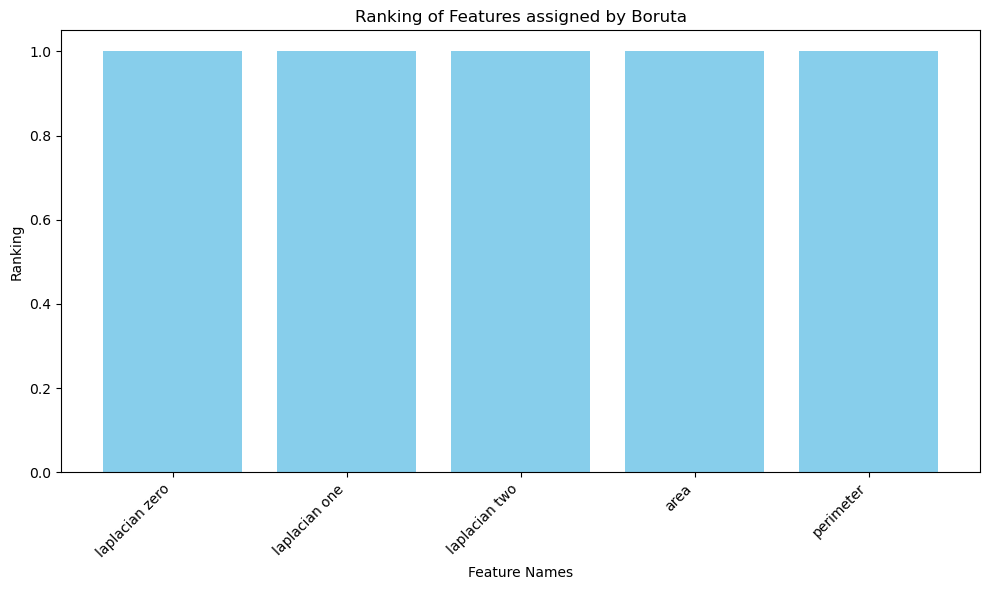

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(columnsName, feat_selector.ranking_, color='skyblue')
plt.xlabel('Feature Names')
plt.ylabel('Ranking')
plt.title('Ranking of Features assigned by Boruta')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()